In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from pyvi import ViTokenizer, ViPosTagger
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics 
from scipy.spatial.distance import cdist 

import string
string.punctuation
import warnings
warnings.filterwarnings('ignore')

In [2]:
book_reviews = pd.read_excel('book_reviews.xlsx', sheet_name='Book_Review')
book_reviews.head()

,Product ID,Book Name,Product Group,Comment Content,Rating,Created At,Create By
0,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,"Tuyệt vời , Bìa đẹp nhưng gốc sách bị trầy xướ...",5,2020-06-08,Nguyễn Nghiêm
1,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,"4* cho chất lượng giấy, đây có thể là cuốn sác...",4,2020-07-07,ĐÁNH GIÁ XE
2,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Sách được in màu trên giấy có chất lượng cao c...,5,2020-08-07,Nguyễn Thị Liên
3,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Phúc cho ai đọc được sách do giáo sư Nguyên Ph...,5,2020-07-21,Jolie Trn
4,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Quyển sách hay nhất sau Hành trình về phương Đ...,5,2020-06-09,Quỳnh Vy


In [3]:
# Remove punctuation function
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [4]:
# remove punctuation --> tokenize
comment_content = book_reviews['Comment Content'].to_numpy()
li_comment = []
for comment in comment_content:
    remove_punctuation = remove_punct(comment)
    tokenize = ViTokenizer.tokenize(remove_punctuation)
    li_comment.append(tokenize)

book_reviews['Comment Content'] = li_comment

In [5]:
book_reviews.head()

,Product ID,Book Name,Product Group,Comment Content,Rating,Created At,Create By
0,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Tuyệt_vời Bìa đẹp nhưng gốc sách bị trầy_xước ...,5,2020-06-08,Nguyễn Nghiêm
1,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,4 cho chất_lượng giấy đây có_thể là cuốn sách ...,4,2020-07-07,ĐÁNH GIÁ XE
2,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Sách được in màu trên giấy có chất_lượng cao_c...,5,2020-08-07,Nguyễn Thị Liên
3,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Phúc cho ai đọc được sách do giáo_sư Nguyên_Ph...,5,2020-07-21,Jolie Trn
4,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Quyển sách hay nhất sau Hành_trình về phương Đ...,5,2020-06-09,Quỳnh Vy


In [6]:
# Remove stopwords --> tf-idf

stop_words = pd.read_csv('vietnamese-stopwords-dash.txt', header=None, delimiter='\n').loc[:, 0].to_list()

vectorizer = TfidfVectorizer(analyzer='word', stop_words=stop_words, use_idf=True)
tfidf_matrix = vectorizer.fit_transform(book_reviews['Comment Content'])

In [7]:
index = [f'Doc_at_index_{i}' for i in range(book_reviews.shape[0])]
weighted_tfidf = pd.DataFrame(data = tfidf_matrix.toarray(), index = index, columns = vectorizer.get_feature_names())

In [8]:
weighted_tfidf.head()

,000,01,0104,02,04,05,0505,0đ,10,100,...,ứng_dụng,ứng_phó,ứng_xử,ーー,ㅠㅠ,ꈍᴗꈍ,것들,멈추면,보이는,비로소
Doc_at_index_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_at_index_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_at_index_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_at_index_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_at_index_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
weighted_tfidf.shape, book_reviews.shape

((8394, 7113), (8394, 7))

# K-mean clustering

In [10]:
#From 7113 dimensions to 2 dimensions.
pca = PCA(n_components=2)
X = pca.fit_transform(weighted_tfidf.to_numpy())

In [11]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1, 10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

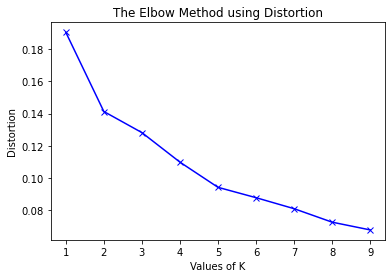

In [12]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [13]:
# Fit K=5

kmeanModel = KMeans(n_clusters=5).fit(X) 
kmeanModel.fit(X)

predicted = kmeanModel.predict(X)
book_reviews['K_mean_group'] = predicted

cluster_0 = X[predicted == 0]
cluster_1 = X[predicted == 1]
cluster_2 = X[predicted == 2]
cluster_3 = X[predicted == 3]
cluster_4 = X[predicted == 4]

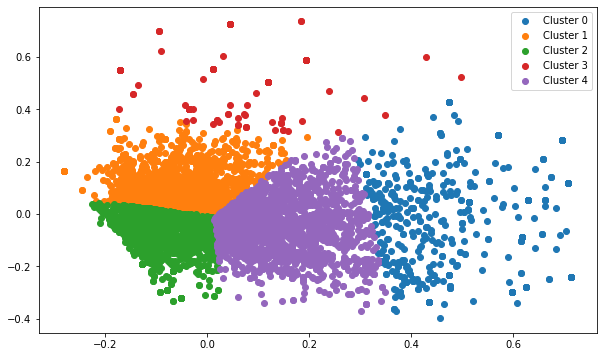

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], label="Cluster 0")
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], label="Cluster 1")
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], label="Cluster 2")
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], label="Cluster 3")
plt.scatter(cluster_4[:, 0], cluster_4[:, 1], label="Cluster 4")
plt.legend(loc='best');

In [15]:
book_reviews.head()

,Product ID,Book Name,Product Group,Comment Content,Rating,Created At,Create By,K_mean_group
0,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Tuyệt_vời Bìa đẹp nhưng gốc sách bị trầy_xước ...,5,2020-06-08,Nguyễn Nghiêm,2
1,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,4 cho chất_lượng giấy đây có_thể là cuốn sách ...,4,2020-07-07,ĐÁNH GIÁ XE,1
2,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Sách được in màu trên giấy có chất_lượng cao_c...,5,2020-08-07,Nguyễn Thị Liên,1
3,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Phúc cho ai đọc được sách do giáo_sư Nguyên_Ph...,5,2020-07-21,Jolie Trn,2
4,54748899,Muôn Kiếp Nhân Sinh (Many Lives - Many Times),Nhà Sách Tiki/Sách tiếng Việt /Sách Tôn Giáo -...,Quyển sách hay nhất sau Hành_trình về phương Đ...,5,2020-06-09,Quỳnh Vy,2
